In [45]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [46]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [66]:
# Fill missing values
train["Age"].fillna(train["Age"].median(), inplace=True)
test["Age"].fillna(test["Age"].median(), inplace=True)

train["Embarked"].fillna(train["Embarked"].mode()[0], inplace=True)
test["Fare"].fillna(test["Fare"].median(), inplace=True)


/tmp/ipython-input-639063491.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train["Age"].fillna(train["Age"].median(), inplace=True)
/tmp/ipython-input-639063491.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [48]:
le = LabelEncoder()

for col in ["Sex", "Embarked"]:
    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col])


In [49]:
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

X = train[features]
y = train["Survived"]


In [50]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [51]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)


LogisticRegression(max_iter=200)

In [52]:
train_acc = model.score(X_train, y_train)
val_acc = model.score(X_val, y_val)

print("Training Accuracy:", train_acc)
print("Validation Accuracy:", val_acc)


Training Accuracy: 0.800561797752809
Validation Accuracy: 0.8100558659217877


In [53]:
test_predictions = model.predict(test[features])


In [54]:
submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": test_predictions
})

submission.to_csv("submission.csv", index=False)



To address the subtask, I will first create the 'FamilySize' feature by combining 'SibSp' and 'Parch' and adding 1, and then create the 'IsAlone' feature based on 'FamilySize' for both the `train` and `test` DataFrames.



In [55]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

train["IsAlone"] = (train["FamilySize"] == 1).astype(int)
test["IsAlone"] = (test["FamilySize"] == 1).astype(int)

print("New features 'FamilySize' and 'IsAlone' created in both train and test dataframes.")
print("Train head with new features:")
print(train[['SibSp', 'Parch', 'FamilySize', 'IsAlone']].head())
print("\nTest head with new features:")
print(test[['SibSp', 'Parch', 'FamilySize', 'IsAlone']].head())

New features 'FamilySize' and 'IsAlone' created in both train and test dataframes.
Train head with new features:
   SibSp  Parch  FamilySize  IsAlone
0      1      0           2        0
1      1      0           2        0
2      0      0           1        1
3      1      0           2        0
4      0      0           1        1

Test head with new features:
   SibSp  Parch  FamilySize  IsAlone
0      0      0           1        1
1      1      0           2        0
2      0      0           1        1
3      0      0           1        1
4      1      1           3        0


Extract titles from the 'Name' column and encode them as numerical features.


In [56]:
import re

# Extract titles from the 'Name' column
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""

train['Title'] = train['Name'].apply(get_title)
test['Title'] = test['Name'].apply(get_title)

print("Titles extracted for train DataFrame:")
print(train['Title'].value_counts())
print(
    "\nTitles extracted for test DataFrame:"
)
print(test['Title'].value_counts())

Titles extracted for train DataFrame:
Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64

Titles extracted for test DataFrame:
Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64


<>:5: SyntaxWarning: invalid escape sequence '\.'
<>:5: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-769023728.py:5: SyntaxWarning: invalid escape sequence '\.'
  title_search = re.search(' ([A-Za-z]+)\.', name)


**Reasoning**:
The previous code generated a SyntaxWarning due to an invalid escape sequence in the regex. To fix this, I will use a raw string literal for the regex pattern. Then, I will consolidate rare titles into an 'Rare' category and apply Label Encoding to convert the 'Title' column into numerical features, as per the instructions.



In [57]:
import re

# Extract titles from the 'Name' column using a raw string for regex to avoid SyntaxWarning
def get_title(name):
    title_search = re.search(r' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""

train['Title'] = train['Name'].apply(get_title)
test['Title'] = test['Name'].apply(get_title)

# Group rare titles
# Identify titles that appear infrequently (e.g., less than 10 occurrences) in the train DataFrame.
rare_titles = train['Title'].value_counts()[train['Title'].value_counts() < 10].index
train['Title'] = train['Title'].replace(rare_titles, 'Rare')
test['Title'] = test['Title'].replace(rare_titles, 'Rare') # Apply the same mapping to the test set

# Handle specific titles found in test but not in train, or vice versa if applicable (e.g., 'Dona' in test)
# Ensure all titles in test are either common or 'Rare'
test['Title'] = test['Title'].replace(['Dona'], 'Rare')

# Encode titles as numerical features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Fit and transform on train data
train['Title'] = le.fit_transform(train['Title'])

# Transform test data using the fitted encoder
test['Title'] = le.transform(test['Title'])

print("Titles extracted, rare titles grouped, and encoded for train DataFrame:")
print(train['Title'].value_counts())
print("\nTitles extracted, rare titles grouped, and encoded for test DataFrame:")
print(test['Title'].value_counts())

Titles extracted, rare titles grouped, and encoded for train DataFrame:
Title
2    517
1    182
3    125
0     40
4     27
Name: count, dtype: int64

Titles extracted, rare titles grouped, and encoded for test DataFrame:
Title
2    240
1     78
3     72
0     21
4      7
Name: count, dtype: int64


Drop original columns



In [58]:
train.drop(columns=['Name', 'SibSp', 'Parch'], inplace=True)
test.drop(columns=['Name', 'SibSp', 'Parch'], inplace=True)

print("Train DataFrame after dropping columns:")
print(train.head())
print("\nTest DataFrame after dropping columns:")
print(test.head())

Train DataFrame after dropping columns:
   PassengerId  Survived  Pclass  Sex   Age            Ticket     Fare Cabin  \
0            1         0       3    1  22.0         A/5 21171   7.2500   NaN   
1            2         1       1    0  38.0          PC 17599  71.2833   C85   
2            3         1       3    0  26.0  STON/O2. 3101282   7.9250   NaN   
3            4         1       1    0  35.0            113803  53.1000  C123   
4            5         0       3    1  35.0            373450   8.0500   NaN   

   Embarked  FamilySize  IsAlone  Title  
0         2           2        0      2  
1         0           2        0      3  
2         2           1        1      1  
3         2           2        0      3  
4         2           1        1      2  

Test DataFrame after dropping columns:
   PassengerId  Pclass  Sex   Age   Ticket     Fare Cabin  Embarked  \
0          892       3    1  34.5   330911   7.8292   NaN         1   
1          893       3    0  47.0   363272   

Update features for model




In [59]:
features_new = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize', 'IsAlone', 'Title']
X = train[features_new]
y = train['Survived']

print("New features defined and X, y datasets re-created.")
print("X head with new features:")
print(X.head())
print("y head:")
print(y.head())

New features defined and X, y datasets re-created.
X head with new features:
   Pclass  Sex   Age     Fare  Embarked  FamilySize  IsAlone  Title
0       3    1  22.0   7.2500         2           2        0      2
1       1    0  38.0  71.2833         0           2        0      3
2       3    0  26.0   7.9250         2           1        1      1
3       1    0  35.0  53.1000         2           2        0      3
4       3    1  35.0   8.0500         2           1        1      2
y head:
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


Split Data


In [60]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and validation sets successfully.")
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")

Data split into training and validation sets successfully.
X_train shape: (712, 8)
X_val shape: (179, 8)
y_train shape: (712,)
y_val shape: (179,)


Train RandomForest Model



In [61]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

print("RandomForestClassifier model trained successfully.")

RandomForestClassifier model trained successfully.


Evaluate RandomForest Model




In [62]:
train_acc_rf = model_rf.score(X_train, y_train)
val_acc_rf = model_rf.score(X_val, y_val)

print("RandomForest Training Accuracy:", train_acc_rf)
print("RandomForest Validation Accuracy:", val_acc_rf)

RandomForest Training Accuracy: 0.9817415730337079
RandomForest Validation Accuracy: 0.8435754189944135


Feature Importance Visualization



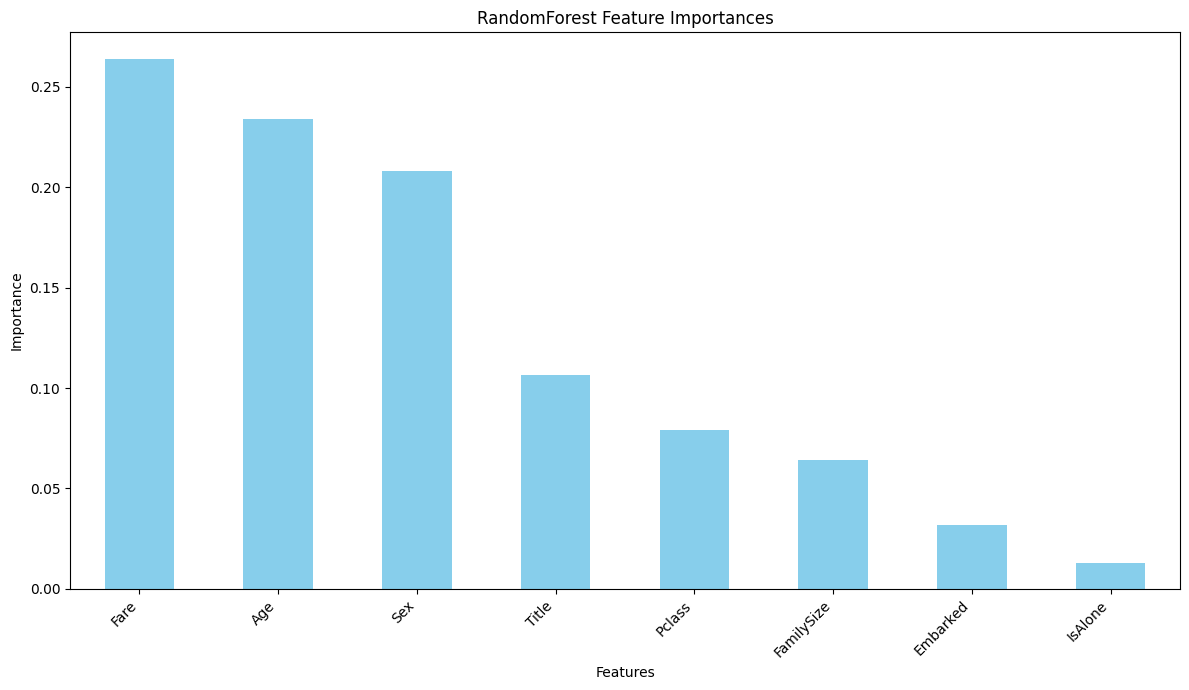

In [63]:
import matplotlib.pyplot as plt

# Get feature importances
importances = model_rf.feature_importances_

# Create a Series with feature names and their importances
feature_importances = pd.Series(importances, index=features_new)

# Sort the importances in descending order
sorted_importances = feature_importances.sort_values(ascending=False)

# Create the bar chart
plt.figure(figsize=(12, 7))
sorted_importances.plot(kind='bar', color='skyblue')
plt.title('RandomForest Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [64]:
test_predictions_rf = model_rf.predict(test[features_new])

print("New predictions generated using RandomForest model.")
print(test_predictions_rf[:5])

New predictions generated using RandomForest model.
[0 0 0 1 1]


In [65]:
submission_rf = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": test_predictions_rf
})

submission_rf.to_csv("submission_rf.csv", index=False)

print("New submission file 'submission_rf.csv' created.")

New submission file 'submission_rf.csv' created.
